In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [ ]:
# Spojení všech souborů z RUIAN dat (rychlejší je spojení CSV než Pandas.Dataframe).
"""
import glob
def load_all_CSVs():
    dfs = []
    paths = glob.glob('CSV/*')
    total = len(paths)
    for i, path in enumerate(paths, 1):
        print('{0}/{1}'.format(i, total))
        df = pd.read_csv(filepath, delimiter=';', encoding='windows-1250')
        df = df.rename(columns={'Souřadnice X': 'x', 'Souřadnice Y': 'y'})
        dfs.append(load(path))
    df = pd.concat(dfs)
    return df
df = load_all_CSVs()
df.to_csv('all.csv', encoding='utf-8')
"""

In [3]:
df = pd.read_csv('all.csv', encoding='utf-8', low_memory=False)

In [4]:
df.head(3)

,Unnamed: 0,Kód ADM,Kód obce,Název obce,Kód MOMC,Název MOMC,Kód MOP,Název MOP,Kód části obce,Název části obce,Kód ulice,Název ulice,Typ SO,Číslo domovní,Číslo orientační,Znak čísla orientačního,PSČ,y,x,Platí Od
0,0,4192575,500011,Želechovice nad Dřevnicí,NaN,NaN,NaN,NaN,195901,Želechovice nad Dřevnicí,796824.0,Přílucká,č.p.,1,NaN,NaN,76311,515561.05,1166540.03,2014-02-12T00:00:00
1,1,4192583,500011,Želechovice nad Dřevnicí,NaN,NaN,NaN,NaN,195901,Želechovice nad Dřevnicí,796824.0,Přílucká,č.p.,2,NaN,NaN,76311,515542.01,1166548.76,2014-02-12T00:00:00
2,2,4192591,500011,Želechovice nad Dřevnicí,NaN,NaN,NaN,NaN,195901,Želechovice nad Dřevnicí,796824.0,Přílucká,č.p.,3,NaN,NaN,76311,515519.61,1166552.19,2014-02-12T00:00:00


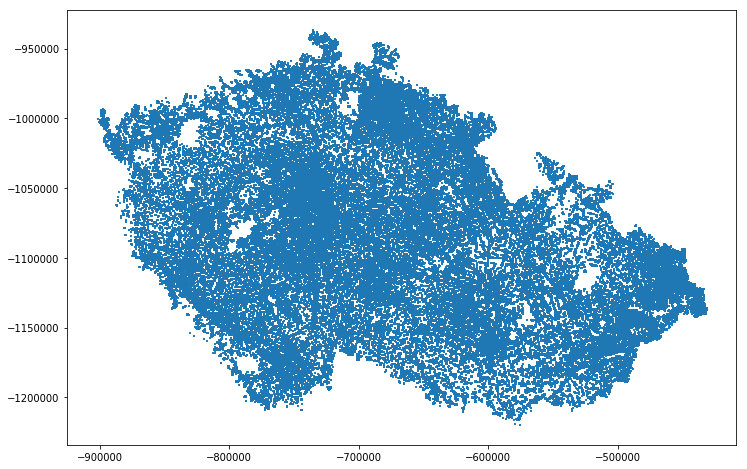

In [5]:
# Vizualizace všech souřadnic v Scatter grafu (pro správné zobrazení platí x=-y, y=-x)
plt.scatter(-df['y'], -df['x'], s=1, marker=',')
plt.show()

In [111]:
# Pro každou obec dle "Kód obce" vypočítat střed ze souřadnic, počet adresních bodů na obec
# a počet unikátních ulic => DATASET_OBCE (při použití reset_index() jsou sloupce sjednoceny a vznikne novy dataframe)
DATASET_OBCE = pd.DataFrame(columns=['kod obce', 'nazev obce', 'stred x', 'stred y', 'pocet', 'unikatni ulice'])
grouped = df.groupby(['Kód obce', 'Název obce'])
for ((kod_obce, nazev_obce), body) in grouped:
    DATASET_OBCE = DATASET_OBCE.append({
        'kod obce': kod_obce, 
        'nazev obce': nazev_obce,
        'stred x': body['x'].mean(),
        'stred y': body['y'].mean(),
        'pocet': len(body),
        'unikatni ulice': len(body['Kód ulice'].unique())}, ignore_index=True)
DATASET_OBCE.head()

,kod obce,nazev obce,stred x,stred y,pocet,unikatni ulice
0,500011,Želechovice nad Dřevnicí,1.167497e+06,515547.560396,732,19
1,500020,Petrov nad Desnou,1.074178e+06,557664.473420,386,1
2,500046,Libhošť,1.123410e+06,487610.828057,561,1
3,500062,Krhová,1.138209e+06,494333.504877,691,37
4,500071,Poličná,1.140544e+06,498539.528366,563,1


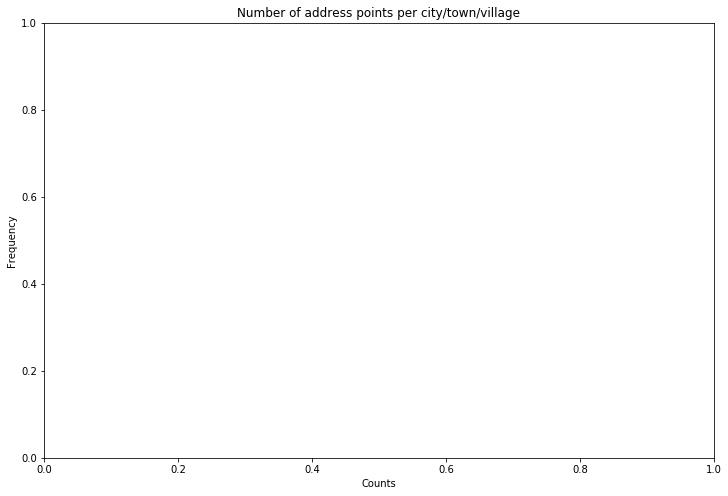

In [6]:
# Vypočtěte histogram dle počtu adresních bodů v obci a zobrazte jej pomocí Bar grafu.
plt.title('Number of address points per city/town/village')
plt.xlabel('Counts')
plt.ylabel('Frequency')
# for some reason it lags python
#plt.hist(DATASET_OBCE['pocet'], bins=100)
plt.show()

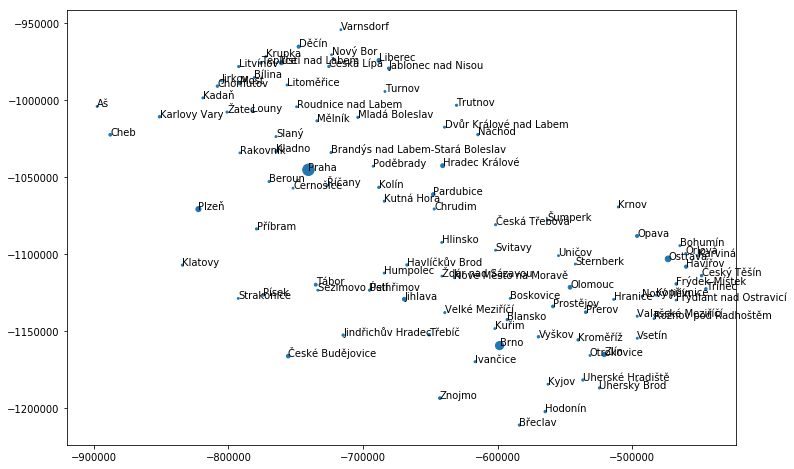

,kod obce,nazev obce,stred x,stred y,pocet,unikatni ulice
2514,554782,Praha,1.045345e+06,740545.973389,130628,7411
4798,582786,Brno,1.159348e+06,598547.671547,67006,1804
2518,554821,Ostrava,1.103109e+06,473318.275363,32762,1834
2515,554791,Plzeň,1.070843e+06,822278.825885,26254,1159
4997,585068,Zlín,1.165119e+06,520767.219546,17649,645


In [21]:
#Vyneste do Scatter grafu 100 obcí s největším počtem adresních míst.
top100 = DATASET_OBCE.sort_values(by='pocet', ascending=False).head(100)
x = -top100['stred y']
y = -top100['stred x']
label = top100['nazev obce']
size = list(top100['pocet'] / 1000)
plt.scatter(x=x, y=y, s=size)
for (i, t) in enumerate(label):
    plt.annotate(t, (x.iloc[i], y.iloc[i]))
plt.show()
top100.head()

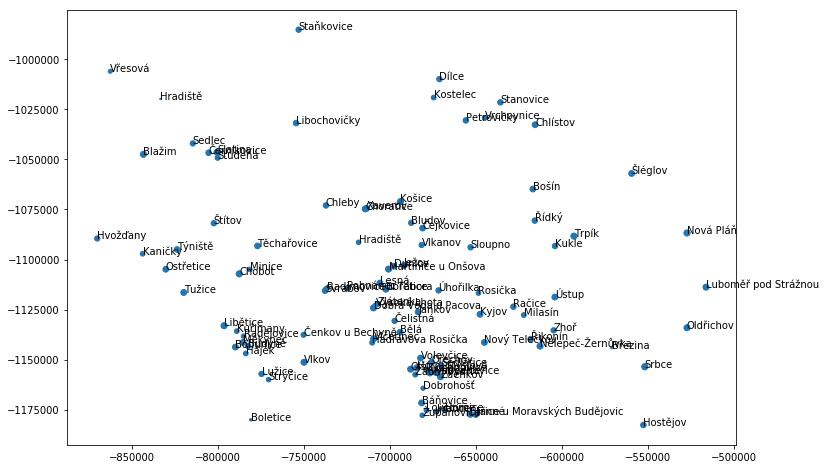

,kod obce,nazev obce,stred x,stred y,pocet,unikatni ulice
2539,555177,Hradiště,1.019722e+06,833383.000000,1,1
5660,592935,Březina,1.144071e+06,571182.530000,4,1
1702,545422,Boletice,1.180070e+06,780759.285000,6,1
2856,560707,Vřesová,1.005974e+06,862369.201250,16,1
3016,562416,Dobrohošť,1.164300e+06,680751.494444,18,1


In [24]:
# Vyneste do Scatter grafu 100 obcí s nejmenším počtem adresních míst.
bottom100 = DATASET_OBCE.sort_values(by='pocet', ascending=True).head(100)
x = -bottom100['stred y']
y = -bottom100['stred x']
label = bottom100['nazev obce']
size = list(bottom100['pocet'] )
plt.scatter(x=x, y=y, s=size)
for (i, t) in enumerate(label):
    plt.annotate(t, (x.iloc[i], y.iloc[i]))
plt.show()
bottom100.head()

In [114]:
#pd.read_excel('13007218_data/1300721803.xlsx')
headers=['nazev obce', 'pocet obyvatel', 'pocet obyvatel muzi', 'pocet obyvatel zeny', 'prumerny vek', 'prumerny vek muzi', 'prumerny vek zeny']
cols=[2, 3, 4, 5, 6, 7, 8]
obyvatele = pd.read_excel('13007218_data/1300721803.xlsx', skiprows=7, header=None, usecols=cols, names=headers)
obyvatele = obyvatele.dropna()
obyvatele.head()

,nazev obce,pocet obyvatel,pocet obyvatel muzi,pocet obyvatel zeny,prumerny vek,prumerny vek muzi,prumerny vek zeny
0,Praha,1294513.0,629550.0,664963.0,41.938089,40.465677,43.332087
2,Benešov,16522.0,7906.0,8616.0,42.558104,40.999874,43.987929
3,Bernartice,233.0,113.0,120.0,44.251073,47.464602,41.225000
4,Bílkovice,207.0,104.0,103.0,43.224638,42.721154,43.733010
5,Blažejovice,116.0,54.0,62.0,45.879310,43.203704,48.209677


In [115]:
DATASET_OBCE_OBYVATELE = pd.merge(DATASET_OBCE, obyvatele, how='left', on=['nazev obce'])
DATASET_OBCE_OBYVATELE.head()

,kod obce,nazev obce,stred x,stred y,pocet,unikatni ulice,pocet obyvatel,pocet obyvatel muzi,pocet obyvatel zeny,prumerny vek,prumerny vek muzi,prumerny vek zeny
0,500011,Želechovice nad Dřevnicí,1.167497e+06,515547.560396,732,19,1855.0,918.0,937.0,44.871968,43.076253,46.631270
1,500020,Petrov nad Desnou,1.074178e+06,557664.473420,386,1,1196.0,598.0,598.0,43.107860,41.279264,44.936455
2,500046,Libhošť,1.123410e+06,487610.828057,561,1,1661.0,832.0,829.0,41.254365,39.902644,42.610977
3,500062,Krhová,1.138209e+06,494333.504877,691,37,2013.0,997.0,1016.0,41.600348,39.931294,43.238189
4,500071,Poličná,1.140544e+06,498539.528366,563,1,1736.0,888.0,848.0,42.466014,40.636261,44.382075


In [ ]:
#Vypočtěte histogram dle počtu obyvatel v obci a zobrazte jej pomocí Bar grafu.

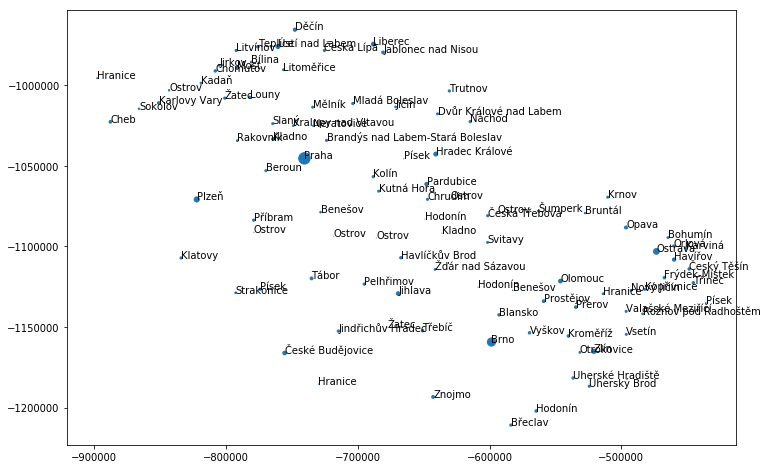

,kod obce,nazev obce,stred x,stred y,pocet,unikatni ulice,pocet obyvatel,pocet obyvatel muzi,pocet obyvatel zeny,prumerny vek,prumerny vek muzi,prumerny vek zeny
3798,554782,Praha,1.045345e+06,740545.973389,130628,7411,1294513.0,629550.0,664963.0,41.938089,40.465677,43.332087
7153,582786,Brno,1.159348e+06,598547.671547,67006,1804,379527.0,183300.0,196227.0,42.794008,41.034741,44.437379
3802,554821,Ostrava,1.103109e+06,473318.275363,32762,1834,290450.0,140768.0,149682.0,42.591221,40.771383,44.302682
3799,554791,Plzeň,1.070843e+06,822278.825885,26254,1159,170936.0,82988.0,87948.0,43.102922,41.643479,44.480056
4746,563889,Liberec,9.744118e+05,688124.349548,15627,981,103979.0,50329.0,53650.0,41.824854,40.247641,43.304436


In [117]:
#Vyneste do Scatter grafu 100 obcí s největším počtem obyvatel.
top100 = DATASET_OBCE_OBYVATELE.sort_values(by='pocet obyvatel', ascending=False).head(100)
x = -top100['stred y']
y = -top100['stred x']
label = top100['nazev obce']
size = list(top100['pocet'] / 1000)
plt.scatter(x=x, y=y, s=size)
for (i, t) in enumerate(label):
    plt.annotate(t, (x.iloc[i], y.iloc[i]))
plt.show()
top100.head()

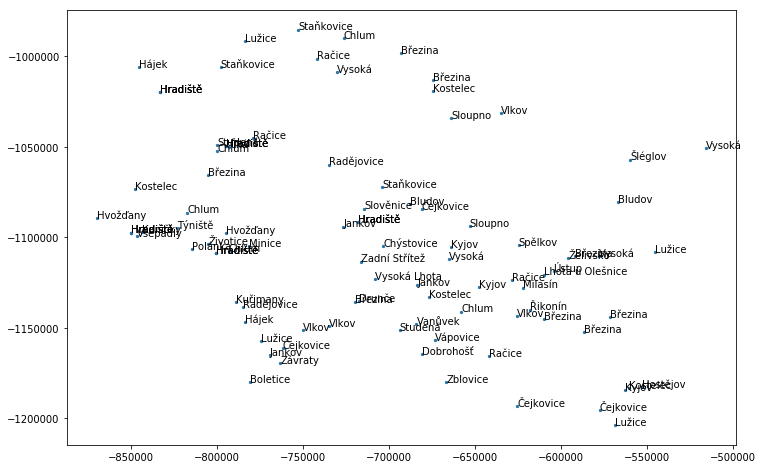

,kod obce,nazev obce,stred x,stred y,pocet,unikatni ulice,pocet obyvatel,pocet obyvatel muzi,pocet obyvatel zeny,prumerny vek,prumerny vek muzi,prumerny vek zeny
4177,559733,Březina,1.065443e+06,805495.270200,200,1,0.0,0.0,0.0,0.0,0.0,0.0
2623,545422,Boletice,1.180070e+06,780759.285000,6,1,0.0,0.0,0.0,0.0,0.0,0.0
3997,557749,Hradiště,1.108653e+06,800839.095532,146,1,0.0,0.0,0.0,0.0,0.0,0.0
3085,549070,Březina,1.013048e+06,674567.428727,55,1,0.0,0.0,0.0,0.0,0.0,0.0
6514,577871,Březina,1.110169e+06,591982.319565,138,1,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
#Vyneste do Scatter grafu 100 obcí s nejmenším počtem obyvatel.
top100 = DATASET_OBCE_OBYVATELE.sort_values(by='pocet obyvatel', ascending=True).head(100)
x = -top100['stred y']
y = -top100['stred x']
label = top100['nazev obce']
size = list(top100['pocet'])
plt.scatter(x=x, y=y, s=5)
for (i, t) in enumerate(label):
    plt.annotate(t, (x.iloc[i], y.iloc[i]))
plt.show()
top100.head()

In [119]:
print('Pocet zaznamu: {0}'.format(len(DATASET_OBCE_OBYVATELE)))
print('Unikatni kod obce: {0}'.format(len(DATASET_OBCE_OBYVATELE['kod obce'].unique())))
print('Unikatni nazev obce: {0}'.format(len(DATASET_OBCE_OBYVATELE['nazev obce'].unique())))
# aha

Pocet zaznamu: 9371
Unikatni kod obce: 6257
Unikatni nazev obce: 5345


In [120]:
#Vypište obce s nejmladším obyvatelstvem.
nejmladsi = DATASET_OBCE_OBYVATELE.sort_values(by='prumerny vek', ascending=True)
nejmladsi[['nazev obce', 'prumerny vek']].head(20)

,nazev obce,prumerny vek
4177,Březina,0.000000
7170,Březina,0.000000
6514,Březina,0.000000
1007,Hradiště,0.000000
1373,Březina,0.000000
3997,Hradiště,0.000000
2174,Hradiště,0.000000
5057,Hradiště,0.000000
2623,Boletice,0.000000
8463,Březina,0.000000


In [146]:
#Vypište obce s největším procentem žen v obci.
def zeny_procento(row):
    return 0 if row['pocet obyvatel zeny'] == 0 else row['pocet obyvatel zeny'] / row['pocet obyvatel']
    
procenta_zeny = DATASET_OBCE_OBYVATELE
procenta_zeny['pocet obyvatel zeny proc'] = procenta_zeny.apply(zeny_procento, axis=1)
procento_zeny = DATASET_OBCE_OBYVATELE.sort_values(by='pocet obyvatel zeny proc', ascending=False)
procento_zeny[['nazev obce', 'pocet obyvatel zeny proc']].head(20)

,nazev obce,pocet obyvatel zeny proc
2188,Zvíkovec,0.668269
1530,Mačkov,0.657627
4381,Černov,0.614679
5126,Vlčí,0.609375
8868,Lubné,0.608696
2088,Bolkov,0.607143
414,Radkova Lhota,0.605911
9171,Přerubenice,0.605634
5998,Anenská Studánka,0.602273
772,Šebestěnice,0.600000
